<a href="https://colab.research.google.com/github/ParitoshP702/BO_vs_RL_Pricing/blob/main/Greedy_and_Constrained_ILS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Greedy ILS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [ ]:
# true_coeff = np.array([-150,480,-165,22,-1])

In [ ]:
from scipy.optimize import minimize

In [ ]:
def generate_demand(p):
  # p_vec = np.array([1,p,p**2,p**3,p**4])
  return 100*np.exp(-((p-5)**2)/20)+np.random.normal(0,3)

In [ ]:
def f_fun(coeff_array,*args):
  sum = 0
  p_arr,d_arr = args
  for i in range(len(p_arr)):
    p = p_arr[i]
    p_vec = np.array([p,p**2])
    demo_demand = np.sum(coeff_array*p_vec)
    sum += (d_arr[i]-demo_demand)**2
  return sum

In [ ]:
def g_fun(p,*args):
  coeff_array = args
  p_vec = np.array([p,p**2])
  return -np.sum(p_vec*coeff_array)

In [ ]:
pl = 0
ph = 100

In [ ]:
def GreedyILS():
  p_demo = np.random.uniform(low = pl,high = ph,size = 1)[0]
  d_demo = generate_demand(p_demo)
  p_array = []
  d_array = []
  p_array.append(p_demo)
  d_array.append(d_demo)
  epsilon_array = []
  for t in tqdm(range(1,101)):
    coeff_estimate = minimize(f_fun,x0 =np.random.random_sample(size = (2,)),args = (p_array,d_array),bounds = [(-50.,50.),(-50.,50.)] )["x"]
    # print(coeff_estimate)
    coeff_estimate = np.array(coeff_estimate)
    # print(coeff_estimate)
    price_estimate = minimize(g_fun,x0 = np.array([random.random()]),args = (coeff_estimate),bounds = [(pl,ph)])["x"][0]
    p_array.append(price_estimate)
    d_new = generate_demand(price_estimate)
    d_array.append(d_new)
    reven_array = np.array(p_array)*np.array(d_array)
    epsilon =np.max([0,np.min(100 - np.array(reven_array))])
    epsilon_array.append(epsilon)
  return np.array(epsilon_array)

In [ ]:
best_till_now_greedy = []
for i in tqdm(range(10)):
  best_till_now_greedy.append(GreedyILS())

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-45-a47243d2bbe3>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_vec = np.array([1,p,p**2,p**3,p**4])

100%|██████████| 10/10 [03:09<00:00, 18.90s/it]


## Constrained ILS

In [ ]:
k = 4

In [ ]:
def ConstrainedILS():
  p_demo = np.random.uniform(low = pl,high = ph,size = 1)[0]
  d_demo = generate_demand(p_demo)
  p_array = []
  d_array = []
  p_array.append(p_demo)
  d_array.append(d_demo)
  epsilon_array = []
  for t in tqdm(range(1,101)):
    coeff_estimate = minimize(f_fun,x0 =np.random.random_sample(size = (2,)),args = (p_array,d_array),bounds = [(-50.,50.),(-50.,50.)] )["x"]
    # print(coeff_estimate)
    coeff_estimate = np.array(coeff_estimate)
    # print(coeff_estimate)
    price_estimate = minimize(g_fun,x0 = np.array([random.random()]),args = (coeff_estimate),bounds = [(pl,ph)])["x"][0]
    p_t = p_array[len(p_array)-1]
    p_bar = np.mean(p_array)
    delta = p_t - p_bar
    if abs(delta)<k*(t**(-0.25)):
      price_estimate = p_t + np.sign(delta)*k*(t**(-0.25))
    p_array.append(price_estimate)
    d_new = generate_demand(price_estimate)
    d_array.append(d_new)
    # reven_array = np.array(p_array)*np.array(d_array)
    epsilon =np.max([0,np.min(100 - np.array(d_array))])
    epsilon_array.append(epsilon)
  return np.array(epsilon_array)

In [ ]:
best_till_now = []
for i in tqdm(range(10)):
  best_till_now.append(ConstrainedILS())

100%|██████████| 10/10 [00:33<00:00,  3.35s/it]


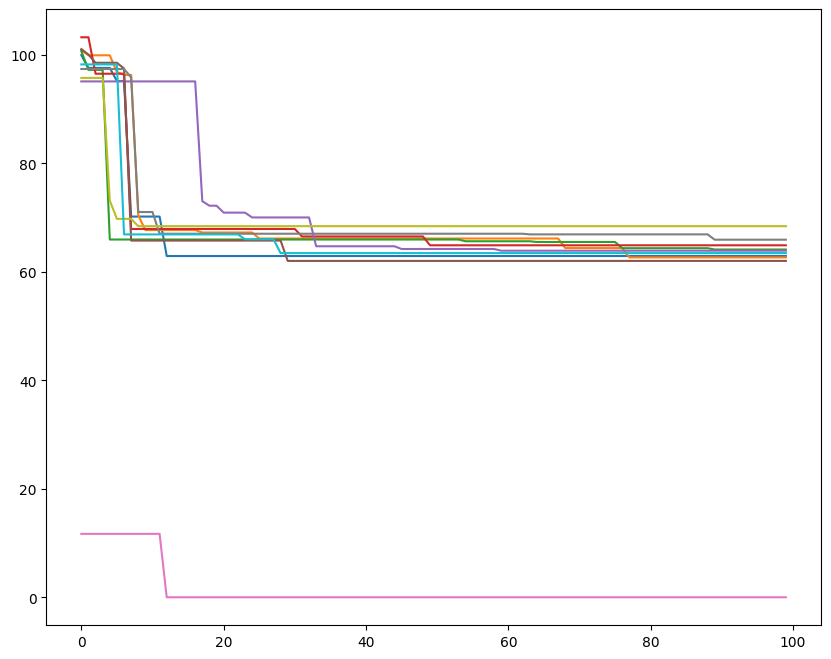

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
for i in range(10):
  plt.plot(best_till_now[i])

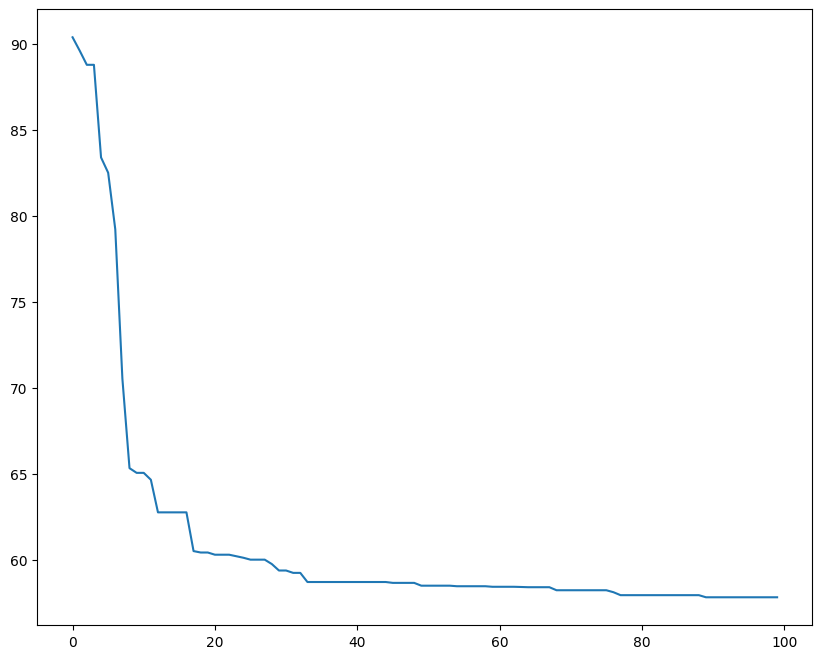

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(np.mean(best_till_now,axis = 0))

In [ ]:
import pickle
best_till_now = np.mean(best_till_now,axis = 0)

In [ ]:
best_till_now

array([90.40134366, 89.62200335, 88.79951393, 88.79951393, 83.41149294,
       82.5219947 , 79.23018991, 70.54116609, 65.33850189, 65.06489889,
       65.06489889, 64.66440911, 62.76725852, 62.76725852, 62.76725852,
       62.76725852, 62.76725852, 60.51481386, 60.43169761, 60.43169761,
       60.3039216 , 60.3039216 , 60.3039216 , 60.21560605, 60.12697044,
       60.01601283, 60.01601283, 60.01601283, 59.75978582, 59.38489345,
       59.38489345, 59.24707455, 59.24707455, 58.71566759, 58.71566759,
       58.71566759, 58.71566759, 58.71566759, 58.71566759, 58.71566759,
       58.71566759, 58.71566759, 58.71566759, 58.71566759, 58.71566759,
       58.66544108, 58.66544108, 58.66544108, 58.66544108, 58.50234896,
       58.50234896, 58.50234896, 58.50234896, 58.50234896, 58.47016351,
       58.47016351, 58.47016351, 58.47016351, 58.47016351, 58.43848827,
       58.43848827, 58.43848827, 58.43848827, 58.42684363, 58.41347772,
       58.41347772, 58.41347772, 58.41347772, 58.23709495, 58.23

In [ ]:
file_path = open("CILS_exp_reven.txt","wb")
pickle.dump(best_till_now,file_path)

In [ ]:
np.sign(5)

1